In [74]:
# Data analyst libraries
import numpy as np
import pandas as pd
import math
import scipy.stats as stats

#baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# menghilangkan display max columns
pd.set_option("display.max_columns", None)
# transform
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [75]:
# import data
df=pd.read_csv('/content/drive/MyDrive/Final Project Virtual Internship - IDX/loan_data_2007_2014.csv')



---

**EXPLORATORY DATA ANALYSIS (EDA)**

---



In [76]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [78]:
df.shape

(466285, 75)

In [79]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [80]:
# checking nan
col=df.columns
check_nan = pd.DataFrame({'count': df.isnull().sum(), 'rate': df.isnull().sum()*100/len(df)})
check_null=check_nan.sort_values(by=['rate'],ascending=False)
round(check_null,2)

,count,rate
inq_last_12m,466285,100.0
total_bal_il,466285,100.0
dti_joint,466285,100.0
verification_status_joint,466285,100.0
annual_inc_joint,466285,100.0
...,...,...
total_pymnt,0,0.0
total_pymnt_inv,0,0.0
total_rec_prncp,0,0.0
total_rec_int,0,0.0


In [81]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [82]:
#drop null col
df = df.drop(['inq_last_12m','total_bal_il','dti_joint','verification_status_joint','annual_inc_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','il_util','open_rv_24m','total_cu_tl','inq_fi','max_bal_bc','all_util','open_rv_12m'], axis = 1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [84]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [85]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [86]:
pd.DataFrame({'Dtype':df.dtypes,'Unique':df.nunique()})

,Dtype,Unique
Unnamed: 0,int64,466285
id,int64,466285
member_id,int64,466285
loan_amnt,int64,1352
funded_amnt,int64,1354
funded_amnt_inv,float64,9854
term,object,2
int_rate,float64,506
installment,float64,55622
grade,object,7


In [87]:
df.shape

(466285, 58)

In [88]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [89]:
#drop null col
df = df.drop(['mths_since_last_major_derog','desc','url','title','mths_since_last_record','mths_since_last_delinq','Unnamed: 0','id','next_pymnt_d','policy_code'], axis = 1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   member_id                   466285 non-null  int64  
 1   loan_amnt                   466285 non-null  int64  
 2   funded_amnt                 466285 non-null  int64  
 3   funded_amnt_inv             466285 non-null  float64
 4   term                        466285 non-null  object 
 5   int_rate                    466285 non-null  float64
 6   installment                 466285 non-null  float64
 7   grade                       466285 non-null  object 
 8   sub_grade                   466285 non-null  object 
 9   emp_title                   438697 non-null  object 
 10  emp_length                  445277 non-null  object 
 11  home_ownership              466285 non-null  object 
 12  annual_inc                  466281 non-null  float64
 13  verification_s

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01
inq_last_6mths,466256.0,8.047446e-01,1.091598e+00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,3.300000e+01


In [92]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [93]:
df['loan_status']=df['loan_status'].replace({'Fully Paid' : '0',
               'Current' : '0',
               'Default' : '0',
               'Late (16-30 days)' : '0',
               'Does not meet the credit policy. Status:Fully Paid' : '0',
               'Late (31-120 days)' : '1',
               'Does not meet the credit policy. Status:Charged Off' : '1',
               'In Grace Period' : '1',
               'Charged Off':'1'})

**Visualization**

In [94]:
df['loan_status'] = df['loan_status'].astype('int64')

In [95]:
# memisahkan numeric dengan categorial data
df_num = df.select_dtypes(exclude='object')
df_o = df.select_dtypes(include='object')

In [96]:
df_num.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

Text(0.5, 1.0, 'Distribusi Charged Off Loan Amount')

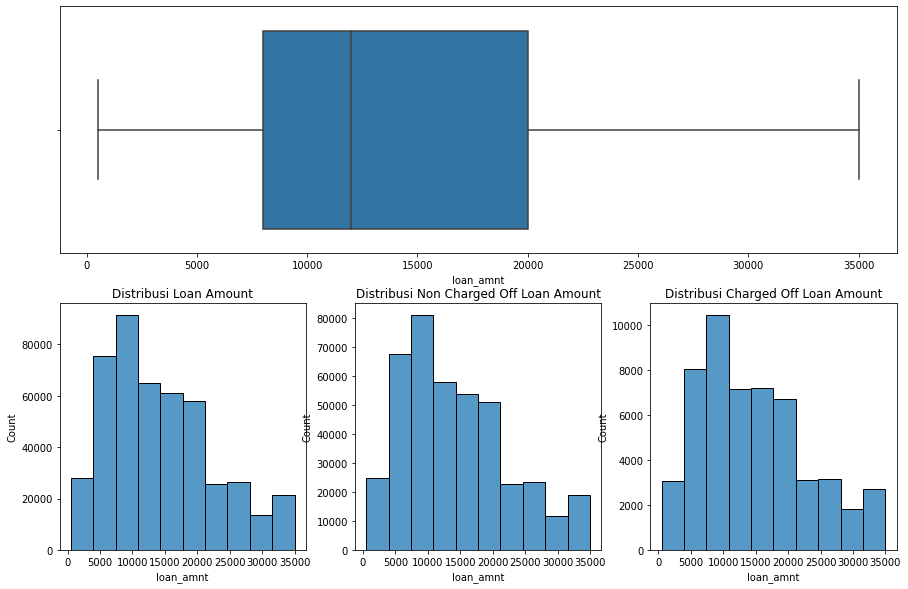

In [97]:
# Visualizatin distribution loan Amount
fig = plt.subplots(figsize=(15,10))
sns.boxplot(df_num.loan_amnt, ax=plt.subplot(211))
sns.histplot(df_num.loan_amnt, bins=10, ax=plt.subplot(234)).set_title('Distribusi Loan Amount')
sns.histplot(df_num[df_num.loan_status==0].loan_amnt, bins=10, ax=plt.subplot(235)).set_title('Distribusi Non Charged Off Loan Amount')
sns.histplot(df_num[df_num.loan_status==1].loan_amnt, bins=10, ax=plt.subplot(236)).set_title('Distribusi Charged Off Loan Amount')

Pada histogram di atas distribusi jumlah pinjaman, terlihat bahwa jumlah pinjaman manapun masih bisa saja terjadinya gagal bayar, dan bisa dapat terlihat bahwa distribusi yang tidak bisa membayar dengan yang bisa membayar tidak berbeda jauh.

Text(0.5, 1.0, 'Distribusi Charged Off Suku Bunga')

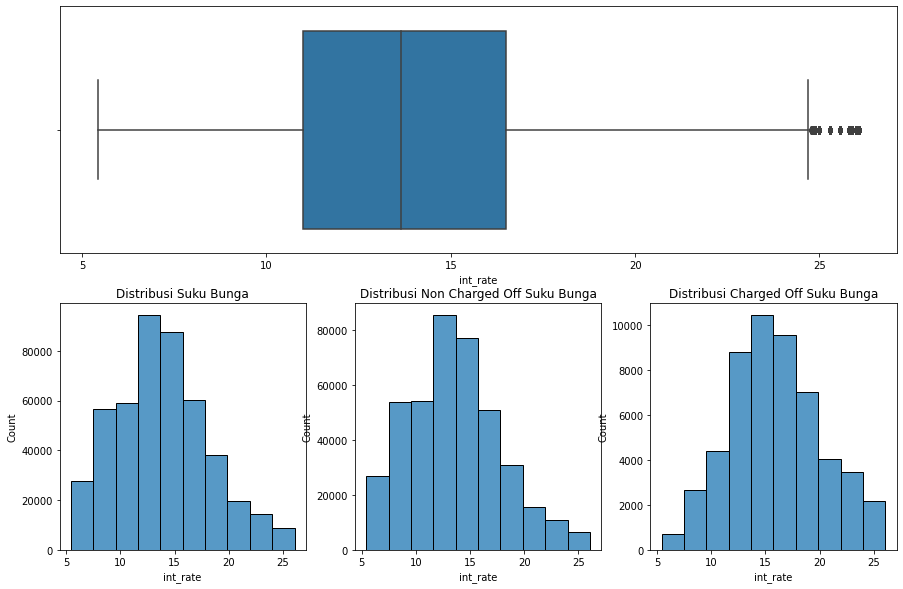

In [98]:
# Visualizatin distribution suku bunga
fig = plt.subplots(figsize=(15,10))
sns.boxplot(df_num.int_rate, ax=plt.subplot(211))
sns.histplot(df_num.int_rate, bins=10, ax=plt.subplot(234)).set_title('Distribusi Suku Bunga')
sns.histplot(df_num[df_num.loan_status==0].int_rate, bins=10, ax=plt.subplot(235)).set_title('Distribusi Non Charged Off Suku Bunga')
sns.histplot(df_num[df_num.loan_status==1].int_rate, bins=10, ax=plt.subplot(236)).set_title('Distribusi Charged Off Suku Bunga')

Pada histogram di atas menunjukkan bahwa peningkatan gagal bayar pinjaman saat suku bunga mulai berada 13%. Hal ini terjadi karena penerima kesulitan untuk mengembalikan uang pinjaman jika range kisaran 10%-25%.

In [99]:
# fill None in object columns where NaN values
for col in list(df_o.select_dtypes(include='object').columns):
  df_o[col].fillna('None',inplace=True)
df_o.head(5)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,None,10+ years,RENT,Verified,Dec-11,n,credit_card,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,n,car,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,None,10+ years,RENT,Not Verified,Dec-11,n,small_business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,n,other,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,n,other,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL


In [100]:
df_o.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

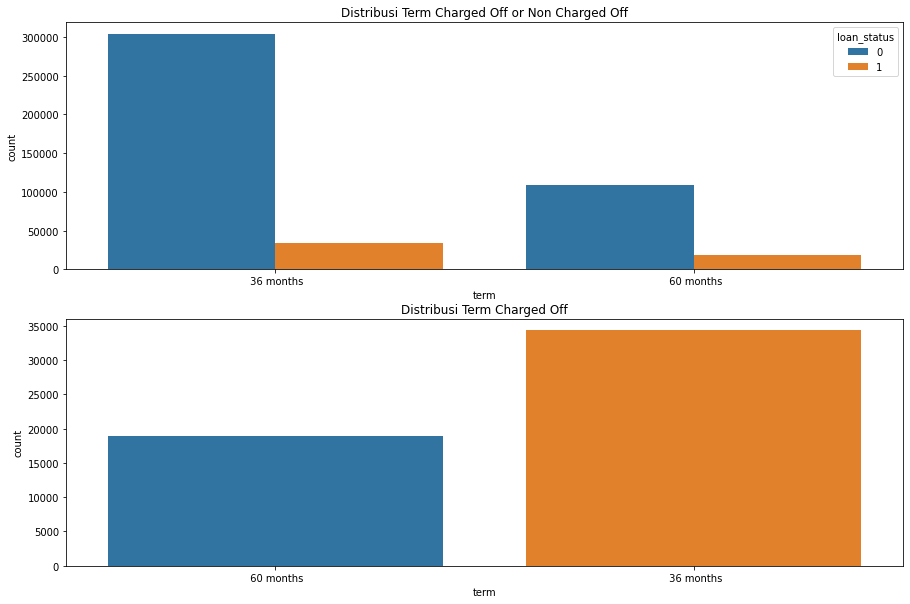

In [101]:
# terms charged off
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='term', hue='loan_status', data = df,ax=plt.subplot(211)).set_title('Distribusi Term Charged Off or Non Charged Off')
sns.countplot(x=df[df.loan_status==1].term, data = df,ax=plt.subplot(212)).set_title('Distribusi Term Charged Off')
plt.show()

Terlihat pada gambar di atas, jika semakin kecil maka gagal bayar akan lebih tinggi, hal ini dikarenakan belum siapnya uang yang masih dikumpulkan oleh penerima pinjaman, sehingga pemberi hutang bisa memberikan jangka waktu yang lebih lama.

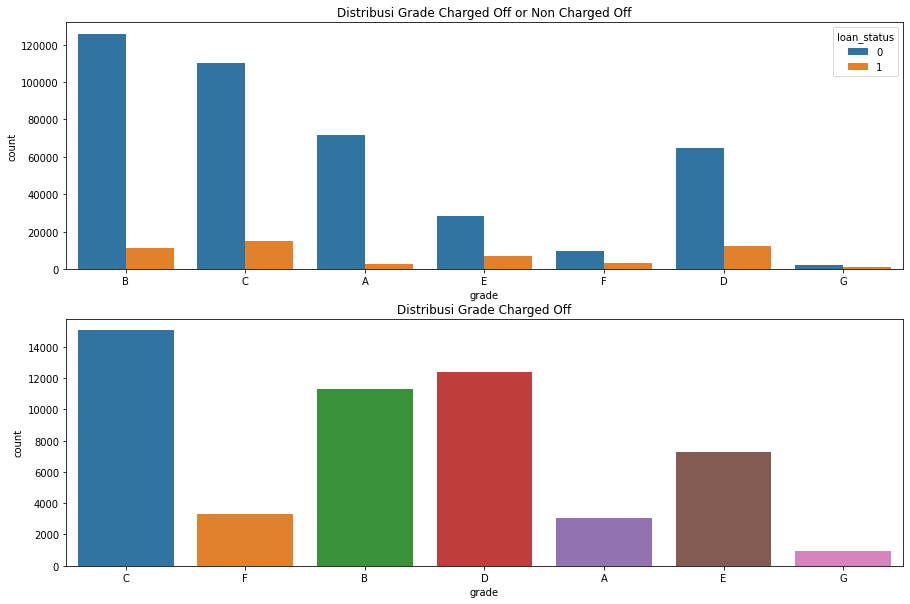

In [102]:
#Grade Charged OFf
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='grade', hue='loan_status', data = df,ax=plt.subplot(211)).set_title('Distribusi Grade Charged Off or Non Charged Off')
sns.countplot(x=df[df.loan_status==1].grade, data = df,ax=plt.subplot(212)).set_title('Distribusi Grade Charged Off')
plt.show()

Bila dilihat grade pinjaman yang paling berisiko adalah C, D, B, dan E yang menyumbang jumlah peminjam gagal.

In [103]:
def cek_distribusi_fraud(col):
  transactioncount = df[[col,'member_id']].groupby([col]).count().reset_index()
  transactioncount.columns = [col,'Transaction count']
  dist_count = df[[col,'loan_status','member_id']].groupby([col,'loan_status']).count().reset_index()
  dist_count.columns = [col,'loan_status','count']
  dist_count = dist_count.merge(transactioncount[[col, 'Transaction count']], how='inner', on=col)
  dist_count['Percentage'] = (dist_count['count']/dist_count['Transaction count'])*100
  return dist_count[dist_count['loan_status']==1].sort_values(by='count',ascending=False).head(15)

In [104]:
cek_distribusi_fraud('emp_title')

,emp_title,loan_status,count,Transaction count,Percentage
99334,Manager,1,450,4438,10.139703
163497,Teacher,1,404,5399,7.482867
159933,Supervisor,1,203,1967,10.320285
134673,Registered Nurse,1,192,2316,8.290155
201137,manager,1,187,1312,14.253049
131837,RN,1,178,2204,8.076225
141806,Sales,1,174,1624,10.714286
53020,Driver,1,154,1296,11.882716
193285,driver,1,125,967,12.926577
117485,Owner,1,124,1527,8.120498


Bisa terlihat pada tabel di atas menunjukkan posisi yang memiliki resiko gagalnya pinjaman pembayaran, terlihat jabatan manager memiliki posisi yang tinggi.

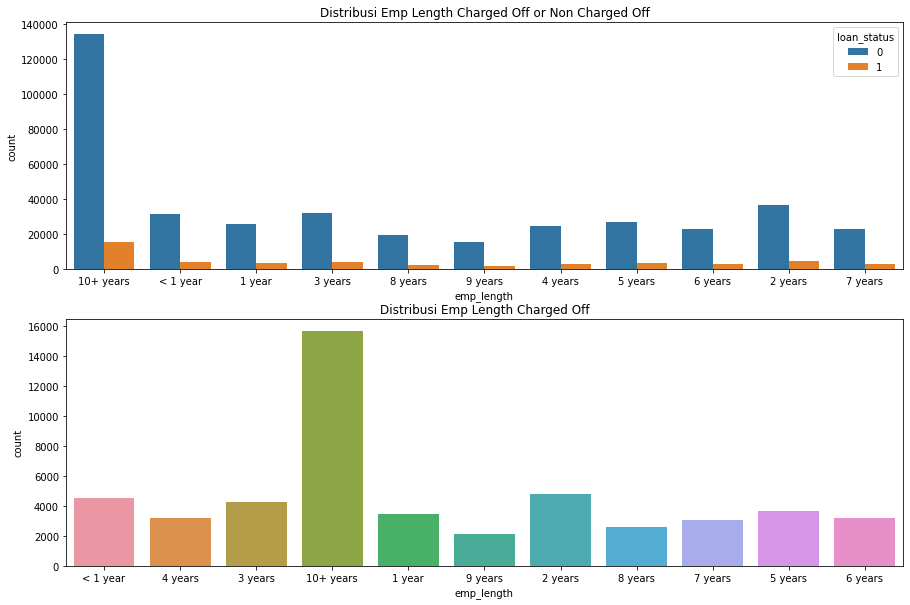

In [105]:
# emp_length charged off
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='emp_length', hue='loan_status', data = df,ax=plt.subplot(211)).set_title('Distribusi Emp Length Charged Off or Non Charged Off')
sns.countplot(x=df[df.loan_status==1].emp_length, data = df,ax=plt.subplot(212)).set_title('Distribusi Emp Length Charged Off')
plt.show()

Ternyata pada gambar di atas menunjukkan yang bekerja di atas 10 tahun lebih berisiko untuk melakukan pembayaran, hal ini bisa saja terjadi dikarenakan adanya pemutusan hubungan kerja untuk melakukan penyegaran.

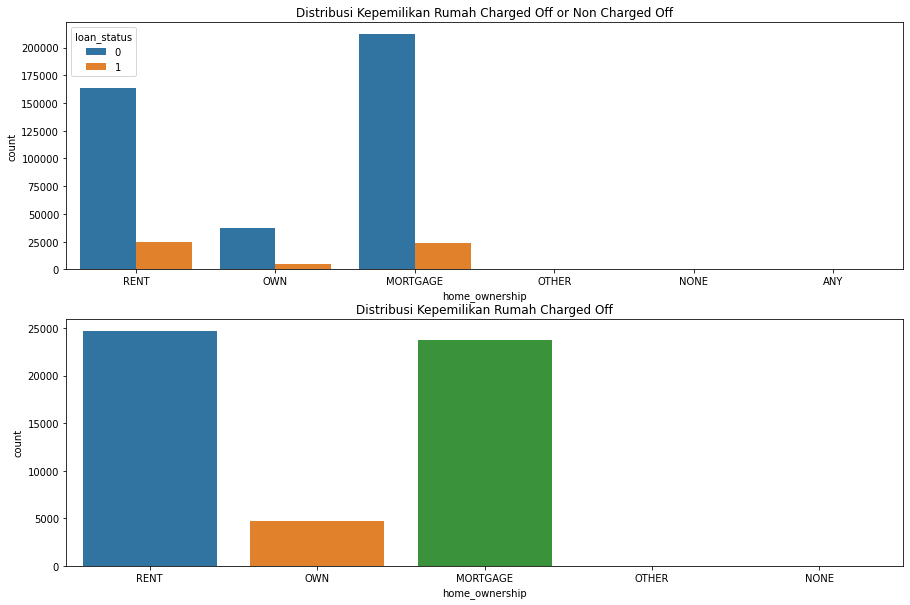

In [106]:
# home_ownership charged off
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='home_ownership', hue='loan_status', data = df,ax=plt.subplot(211)).set_title('Distribusi Kepemilikan Rumah Charged Off or Non Charged Off')
sns.countplot(x=df[df.loan_status==1].home_ownership, data = df,ax=plt.subplot(212)).set_title('Distribusi Kepemilikan Rumah Charged Off')
plt.show()

Dari gambar di atas menunjukkan bahwa gagal bayar bisa saja terjadi dikarenakan melakukan sewa maupun hipotek rumah, sehingga fokus peminjam tidak lagi pada pengembalian pinjaman, tapi kebutuhan diri sendiri terlebih dahulu.

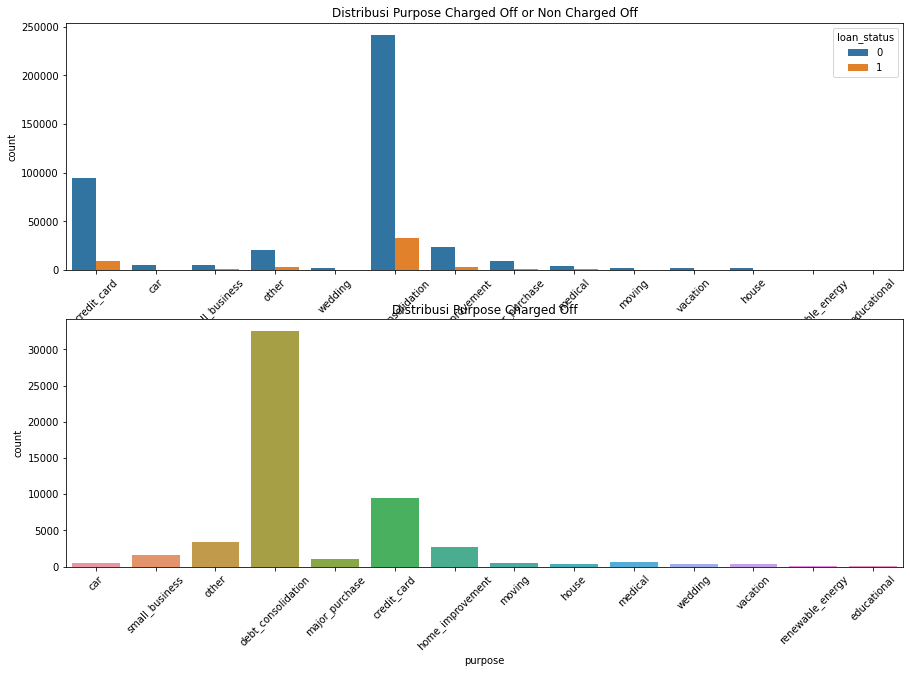

In [107]:
# purpose charged off
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='purpose', hue='loan_status', data = df,ax=plt.subplot(211)).set_title('Distribusi Purpose Charged Off or Non Charged Off')
plt.xticks(rotation=45)
sns.countplot(x=df[df.loan_status==1].purpose, data = df,ax=plt.subplot(212)).set_title('Distribusi Purpose Charged Off')
plt.xticks(rotation=45)
plt.show()

Bila terlihat pada histogram di atas, gagal bayar terjadi dikarenakam melakukan untuk konsolidasi hutang dan kartu kredit. Ini menunjukkan gagal bayar lebih sering untuk melakukan konsolidasi hutang dan kemungkinan dipakai konsumtif dari kartu kredit.

In [108]:
df_o.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,None,10+ years,RENT,Verified,Dec-11,n,credit_card,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,n,car,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,None,10+ years,RENT,Not Verified,Dec-11,n,small_business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,n,other,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,n,other,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL


In [109]:
df.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                  

In [110]:
df.shape
df=df.dropna()

In [111]:
df.shape

(372168, 48)



---

**Building Model**

---



In [112]:
#drop useless col
df = df.drop(['zip_code','member_id','addr_state','earliest_cr_line','last_credit_pull_d','last_pymnt_d','application_type','emp_title'], axis = 1)

In [113]:
df_o.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [114]:
# check the percentage of fraud in the dataset
100*df.loan_status.value_counts(normalize=True)

0    89.515219
1    10.484781
Name: loan_status, dtype: float64

In [115]:
df_o.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205476
emp_length                 12
home_ownership              6
verification_status         3
issue_d                    91
pymnt_plan                  2
purpose                    14
zip_code                  888
addr_state                 50
earliest_cr_line          665
initial_list_status         2
last_pymnt_d               99
last_credit_pull_d        104
application_type            1
dtype: int64

**Data Encoding**

In [116]:
df['term'] = labelencoder.fit_transform(df['term'])
df['grade'] = labelencoder.fit_transform(df['grade'])
df['sub_grade'] = labelencoder.fit_transform(df['sub_grade'])
df['emp_length'] = labelencoder.fit_transform(df['emp_length'])
df['home_ownership'] = labelencoder.fit_transform(df['home_ownership'])
df['emp_length'] = labelencoder.fit_transform(df['emp_length'])
df['issue_d'] = labelencoder.fit_transform(df['issue_d'])
df['pymnt_plan'] = labelencoder.fit_transform(df['pymnt_plan'])
df['verification_status'] = labelencoder.fit_transform(df['verification_status'])
df['purpose'] = labelencoder.fit_transform(df['purpose'])
df['initial_list_status'] = labelencoder.fit_transform(df['initial_list_status'])

**Correlation**

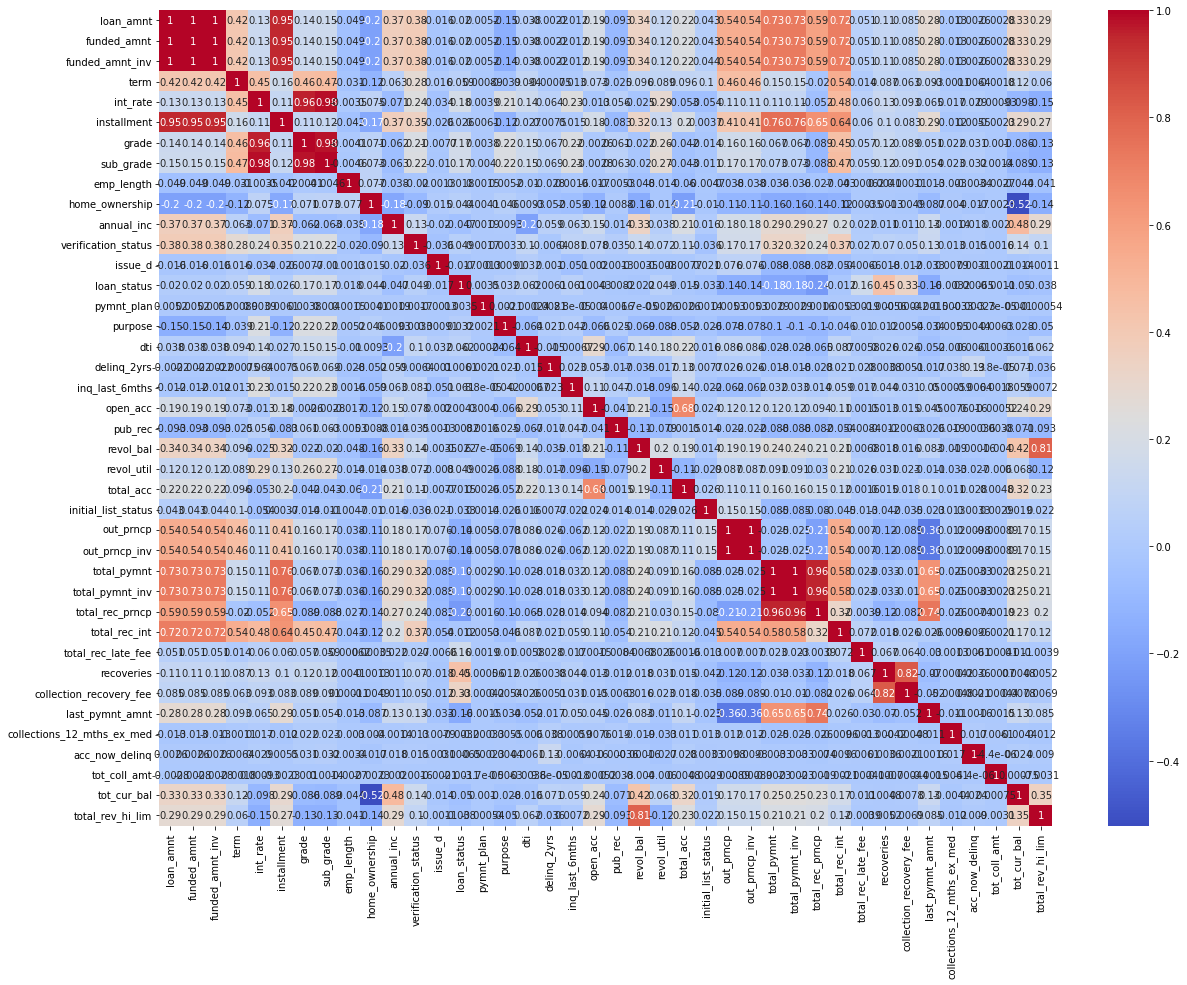

In [117]:
df_corr=df.corr()
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(df_corr, cmap="coolwarm", annot=True)
plt.show()

In [118]:
def correlation(dataset, threshold):
    col_corr = set() # This set stores the highly correlated columns
    corr_matrix = dataset.corr() #correlation matrix
    #traversing the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr
corr_features = correlation(df,0.85)
corr_features

{'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'out_prncp_inv',
 'sub_grade',
 'total_pymnt_inv',
 'total_rec_prncp'}

In [119]:
#drop multicol
df = df.drop(['installment','funded_amnt_inv','grade','out_prncp_inv','sub_grade','total_pymnt_inv','total_rec_prncp'], axis = 1)

In [146]:
df.shape

(372168, 33)

In [120]:
# split data
X = df.drop(['loan_status'], axis=1)
Y = df.loan_status

**Logistic Regression**

In [121]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [122]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
print('Y_train_pred: ',Y_train_pred)
Y_test_pred = model.predict(X_test)
print('Y_test_pred: ', Y_test_pred)

Y_train_pred:  [0 0 1 ... 0 0 0]
Y_test_pred:  [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     66699
           1       1.00      0.75      0.85      7735

    accuracy                           0.97     74434
   macro avg       0.98      0.87      0.92     74434
weighted avg       0.97      0.97      0.97     74434



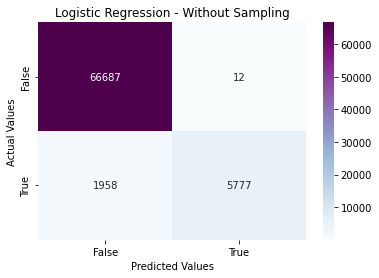

In [123]:
print(classification_report(Y_test, Y_test_pred))
cf_matrix = confusion_matrix(Y_test, Y_test_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Logistic Regression - Without Sampling')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [124]:
#evaluating the model
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(Y_test,Y_test_pred)
f_score = f1_score(Y_test, Y_test_pred, average='weighted')
precision = precision_score(Y_test, Y_test_pred)
recall = metrics.recall_score(Y_test,Y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.97182,0.997927,0.746865


In [125]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = Y_test.copy()

test_output.value_counts(normalize=True)

0    0.896082
1    0.103918
Name: loan_status, dtype: float64

In [126]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_resample(X_train,Y_train)

Y_rus.value_counts()

0    31286
1    31286
Name: loan_status, dtype: int64

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rus, Y_rus, test_size=0.2, random_state=42, stratify=Y_rus)

In [128]:
#creating a baseline linear model
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_train_pred

array([0, 1, 0, ..., 0, 1, 1])

In [129]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     66699
           1       0.94      0.76      0.84      7735

    accuracy                           0.97     74434
   macro avg       0.95      0.88      0.91     74434
weighted avg       0.97      0.97      0.97     74434



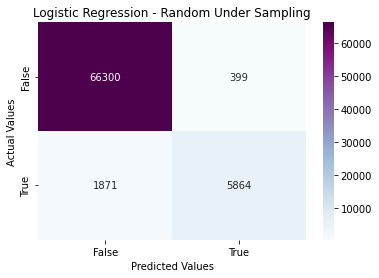

In [131]:
cf_matrix = confusion_matrix(test_output, test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Logistic Regression - Random Under Sampling')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [132]:
#evaluating the model
model_name = 'Logistic Regression - Random Under Sampling'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112


In [133]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_resample(X_train,Y_train)

Y_ros.value_counts()

0    25029
1    25029
Name: loan_status, dtype: int64

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=42, stratify=Y_ros)

In [135]:
#creating a baseline linear model
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_train_pred

array([1, 1, 0, ..., 0, 1, 1])

In [136]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     66699
           1       0.94      0.76      0.84      7735

    accuracy                           0.97     74434
   macro avg       0.95      0.88      0.91     74434
weighted avg       0.97      0.97      0.97     74434



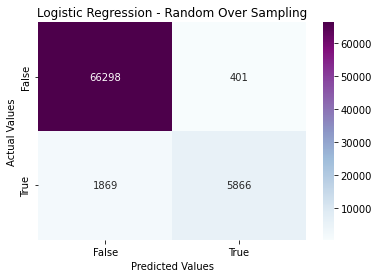

In [138]:
cf_matrix = confusion_matrix(test_output, test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Logistic Regression - Random Over Sampling')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [139]:
#evaluating the model
model_name = 'Logistic Regression - Random Over Sampling'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112
2,Logistic Regression - Random Over Sampling,0.879963,0.878746,0.969503,0.968070,0.936014,0.758371


**Decision Tree**

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     66691
           1       0.98      0.75      0.85      7743

    accuracy                           0.97     74434
   macro avg       0.98      0.88      0.92     74434
weighted avg       0.97      0.97      0.97     74434



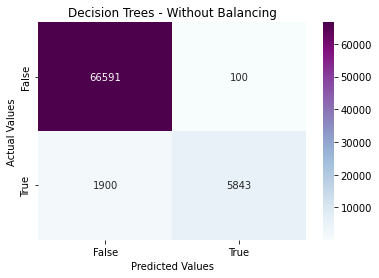

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112
2,Logistic Regression - Random Over Sampling,0.879963,0.878746,0.969503,0.968070,0.936014,0.758371
3,Decision Tree - without balancing,0.974343,0.973131,0.973131,0.971542,0.983173,0.754617


In [140]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)

print(classification_report(Y_test, Y_test_pred))

cf_matrix = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Decision Trees - Without Balancing')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

#evaluating the model
model_name = 'Decision Tree - without balancing'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(Y_test, Y_test_pred)
f_score = f1_score(Y_test, Y_test_pred, average='weighted')
precision = precision_score(Y_test, Y_test_pred)
recall = metrics.recall_score(Y_test, Y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     66699
           1       0.82      0.79      0.81      7735

    accuracy                           0.96     74434
   macro avg       0.90      0.89      0.89     74434
weighted avg       0.96      0.96      0.96     74434



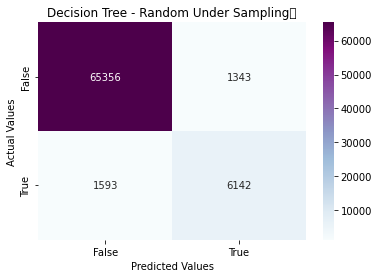

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112
2,Logistic Regression - Random Over Sampling,0.879963,0.878746,0.969503,0.968070,0.936014,0.758371
3,Decision Tree - without balancing,0.974343,0.973131,0.973131,0.971542,0.983173,0.754617
4,Decision Tree - Random Under Sampling,0.898316,0.892689,0.960556,0.960269,0.820574,0.794053


In [141]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_rus, Y_rus, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))
cf_matrix = confusion_matrix(test_output, test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Decision Tree - Random Under Sampling	')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

#evaluating the model
model_name = 'Decision Tree - Random Under Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     66699
           1       0.83      0.79      0.81      7735

    accuracy                           0.96     74434
   macro avg       0.90      0.89      0.89     74434
weighted avg       0.96      0.96      0.96     74434



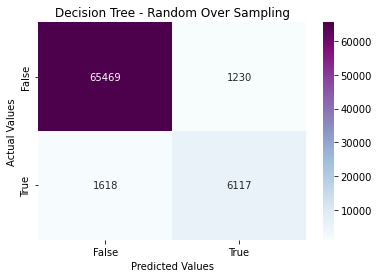

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112
2,Logistic Regression - Random Over Sampling,0.879963,0.878746,0.969503,0.968070,0.936014,0.758371
3,Decision Tree - without balancing,0.974343,0.973131,0.973131,0.971542,0.983173,0.754617
4,Decision Tree - Random Under Sampling,0.898316,0.892689,0.960556,0.960269,0.820574,0.794053
5,Decision Tree - Random Over Sampling,0.900390,0.888534,0.961738,0.961301,0.832585,0.790821


In [142]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))
cf_matrix = confusion_matrix(test_output, test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Decision Tree - Random Over Sampling')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

#evaluating the model
model_name = 'Decision Tree - Random Over Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

**Random Forest**

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     66691
           1       0.98      0.75      0.85      7743

    accuracy                           0.97     74434
   macro avg       0.98      0.88      0.92     74434
weighted avg       0.97      0.97      0.97     74434



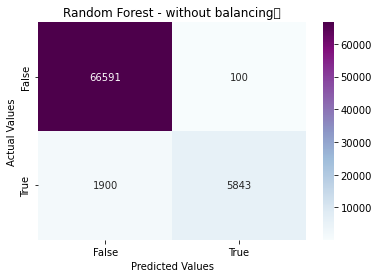

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112
2,Logistic Regression - Random Over Sampling,0.879963,0.878746,0.969503,0.968070,0.936014,0.758371
3,Decision Tree - without balancing,0.974343,0.973131,0.973131,0.971542,0.983173,0.754617
4,Decision Tree - Random Under Sampling,0.898316,0.892689,0.960556,0.960269,0.820574,0.794053
5,Decision Tree - Random Over Sampling,0.900390,0.888534,0.961738,0.961301,0.832585,0.790821
6,Random Forest - without balancing,0.999983,0.973829,0.973131,0.971542,0.983173,0.754617


In [143]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

print(classification_report(Y_test, Y_test_pred))
cf_matrix = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Random Forest - without balancing	')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

#evaluating the model
model_name = 'Random Forest - without balancing'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(Y_test, Y_test_pred)
f_score = f1_score(Y_test, Y_test_pred, average='weighted')
precision = precision_score(Y_test, Y_test_pred)
recall = metrics.recall_score(Y_test, Y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     66699
           1       0.82      0.81      0.82      7735

    accuracy                           0.96     74434
   macro avg       0.90      0.90      0.90     74434
weighted avg       0.96      0.96      0.96     74434



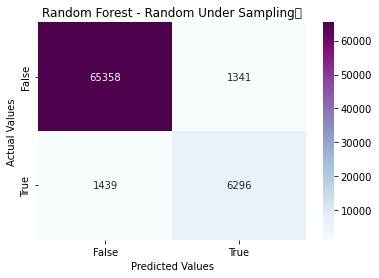

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112
2,Logistic Regression - Random Over Sampling,0.879963,0.878746,0.969503,0.968070,0.936014,0.758371
3,Decision Tree - without balancing,0.974343,0.973131,0.973131,0.971542,0.983173,0.754617
4,Decision Tree - Random Under Sampling,0.898316,0.892689,0.960556,0.960269,0.820574,0.794053
5,Decision Tree - Random Over Sampling,0.900390,0.888534,0.961738,0.961301,0.832585,0.790821
6,Random Forest - without balancing,0.999983,0.973829,0.973131,0.971542,0.983173,0.754617
7,Random Forest - Random Under Sampling,1.000000,0.901398,0.962651,0.962546,0.824407,0.813963


In [144]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_rus,Y_rus, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))
cf_matrix = confusion_matrix(test_output, test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Random Forest - Random Under Sampling	')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

#evaluating the model
model_name = 'Random Forest - Random Under Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     66699
           1       0.82      0.81      0.82      7735

    accuracy                           0.96     74434
   macro avg       0.90      0.90      0.90     74434
weighted avg       0.96      0.96      0.96     74434



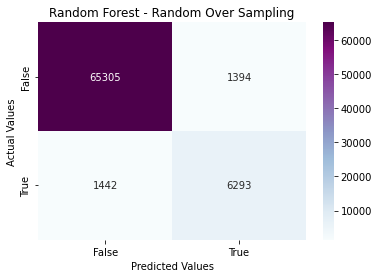

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.974259,0.973534,0.973534,0.971820,0.997927,0.746865
1,Logistic Regression - Random Under Sampling,0.879577,0.879664,0.969503,0.968066,0.936293,0.758112
2,Logistic Regression - Random Over Sampling,0.879963,0.878746,0.969503,0.968070,0.936014,0.758371
3,Decision Tree - without balancing,0.974343,0.973131,0.973131,0.971542,0.983173,0.754617
4,Decision Tree - Random Under Sampling,0.898316,0.892689,0.960556,0.960269,0.820574,0.794053
5,Decision Tree - Random Over Sampling,0.900390,0.888534,0.961738,0.961301,0.832585,0.790821
6,Random Forest - without balancing,0.999983,0.973829,0.973131,0.971542,0.983173,0.754617
7,Random Forest - Random Under Sampling,1.000000,0.901398,0.962651,0.962546,0.824407,0.813963
8,Random Forest - Random Over Sampling,1.000000,0.894626,0.961899,0.961847,0.818655,0.813575


In [145]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))
cf_matrix = confusion_matrix(test_output, test_pred)
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'BuPu', fmt = 'd')
ax.set_title('Random Forest - Random Over Sampling')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

#evaluating the model
model_name = 'Random Forest - Random Over Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

**Kesimpulan:**

1) Hutang yang sering gagal bayar karena dipakai untuk konsolidasi hutang, kartu kredit, dan improv rumah.

2) Jabatan manajer dan guru menyumbang gagal bayar yang tinggi, ini diakibatkan adanya kebutuhan konsumtif dan bagi guru diperkirakan karena kurangnya gaji dari guru.

3) Rumah yang dijadikan hipotek dan sewa memiliki banyak peminjam yang gagal bayar, hal ini dikarenakan peminjam memiliki fokus finansial kepada sewa atau bayar rumah dibandingkan untuk membayar hutang, hal ini yang menyebabkan peminjam telat hingga gagal bayar.

4) Lamanya jatuh tempo pembayaran hutang juga memiliki pengaruh, karena semakin cepatnya jatuh tempo, maka semakin besarnya resiko gagal bayar, hal ini dikarenakan peminjam kekurangan waktu untuk mengumpulkan uang untuk membayar hutang.

5) Suku bunga di atas 10% sudah mulai memberatkan bagi peminjam, hal ini dapat terlihat pada distribusi histogram yang telah dibuat, setelah di atas 10% gagal bayar dari peminjam mulai meningkat.

**Rekomendasi:**

1) Pemberi pinjaman harus selektif dengan memperhatikan kewajiban dari peminjam seperti apakah peminjam memiliki rumah sendiri atau sewa.

2) Selain itu posisi pekerjaan peminjam juga harus diperhatikan, apakah peminjam memiliki gaji yang sesuai agar bisa membayar kewajiban kebutuhan hidupnya dan pinjaman atau tidak

3) Pemberi pinjaman harus selektif juga untuk penggunaan dana pinjaman dari peminjam, dan juga besar pinjaman.

4) Salah satu solusi dari pemberi pinjaman adalah mengurangi suku bunga atau meningkatkan lamanya jatuh tempo pembayaran, agar peminjam bisa dapat mengumpulkan uang untuk membayar.

**Machine Learning yang terbaik**
Machine Learning yang terbaik dari sembilan model yang dibuat adalah Random Forest - Random Under Sampling, dikarenakan kesusaian kriteria yang dibutuhkan, yaitu recall yang tinggi sebesar 81%, precision sebesar 82%, dan akurasi sebesar 96%.